In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\user\Downloads\synthetic_fraud_dataset.csv")

In [4]:
df.head()

,user_id,account_age_days,transaction_amount,transaction_hour,payment_method,is_international,device_type,transactions_last_1h,transactions_last_24h,previous_fraud_flag,is_fraud
0,4174,915,86.24,20,mpesa,0,desktop,2,3,1,0
1,4507,210,48.16,16,card,0,mobile,3,7,0,0
2,1860,741,236.37,22,paypal,0,desktop,0,6,0,0
3,2294,862,77.04,9,card,0,desktop,2,4,0,0
4,2130,275,192.88,18,card,0,desktop,1,6,0,0


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

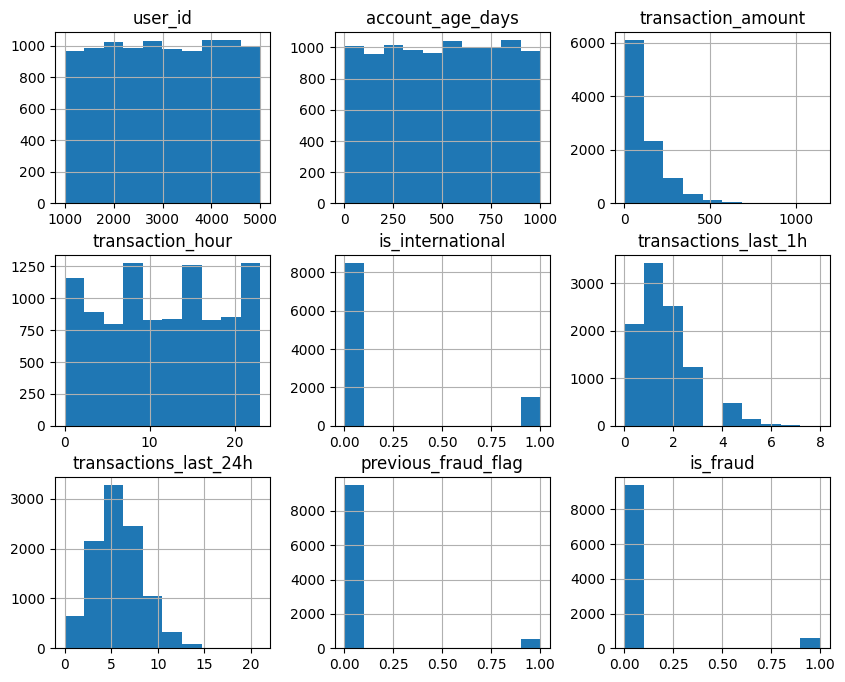

In [9]:

df.hist(figsize=(10,8))
plt.tight_layout

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10000 non-null  int64  
 1   account_age_days       10000 non-null  int64  
 2   transaction_amount     10000 non-null  float64
 3   transaction_hour       10000 non-null  int64  
 4   payment_method         10000 non-null  object 
 5   is_international       10000 non-null  int64  
 6   device_type            10000 non-null  object 
 7   transactions_last_1h   10000 non-null  int64  
 8   transactions_last_24h  10000 non-null  int64  
 9   previous_fraud_flag    10000 non-null  int64  
 10  is_fraud               10000 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 859.5+ KB


In [11]:
#we start by understanding the distribution
df['is_fraud'].value_counts()

is_fraud
0    9381
1     619
Name: count, dtype: int64

In [13]:
df['is_fraud'].value_counts(normalize=True)*100

is_fraud
0    93.81
1     6.19
Name: proportion, dtype: float64

In [14]:
new=df.copy()

In [15]:
#we have to try and use the values that are not identifiers

In [17]:
new.head()

,user_id,account_age_days,transaction_amount,transaction_hour,payment_method,is_international,device_type,transactions_last_1h,transactions_last_24h,previous_fraud_flag,is_fraud
0,4174,915,86.24,20,mpesa,0,desktop,2,3,1,0
1,4507,210,48.16,16,card,0,mobile,3,7,0,0
2,1860,741,236.37,22,paypal,0,desktop,0,6,0,0
3,2294,862,77.04,9,card,0,desktop,2,4,0,0
4,2130,275,192.88,18,card,0,desktop,1,6,0,0


In [50]:
#we need to start caing out our libraries
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [23]:
y=new['is_fraud']

In [24]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10000 non-null  int64  
 1   account_age_days       10000 non-null  int64  
 2   transaction_amount     10000 non-null  float64
 3   transaction_hour       10000 non-null  int64  
 4   payment_method         10000 non-null  object 
 5   is_international       10000 non-null  int64  
 6   device_type            10000 non-null  object 
 7   transactions_last_1h   10000 non-null  int64  
 8   transactions_last_24h  10000 non-null  int64  
 9   previous_fraud_flag    10000 non-null  int64  
 10  is_fraud               10000 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 859.5+ KB


In [28]:
numericals=['account_age_days','transaction_amount','transaction_hour','is_international','transactions_last_1h','transactions_last_24h','previous_fraud_flag']

In [29]:
categories=['payment_method','device_type']

In [30]:
x=new[numericals+categories]

In [31]:
x.head()

,account_age_days,transaction_amount,transaction_hour,is_international,transactions_last_1h,transactions_last_24h,previous_fraud_flag,payment_method,device_type
0,915,86.24,20,0,2,3,1,mpesa,desktop
1,210,48.16,16,0,3,7,0,card,mobile
2,741,236.37,22,0,0,6,0,paypal,desktop
3,862,77.04,9,0,2,4,0,card,desktop
4,275,192.88,18,0,1,6,0,card,desktop


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [33]:
#we have to train and test the model
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.4,random_state=42)

In [34]:
preprocessing=ColumnTransformer([
    ('oht',OneHotEncoder(drop='first'),categories),
    ('sct',StandardScaler(),numericals)
])

In [36]:
features=FeatureUnion([
    ('skt',SelectKBest(score_func=f_classif))
])

In [38]:
#we have to difine our models
lgr=linear_model.LogisticRegression()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

In [39]:
ensemble=VotingClassifier(
    estimators=[('lgr',lgr),
                ('rf',rf),
                ('dt',dt)],
    voting='soft'
)

In [41]:
#building the pipeline
fraud_pipeline=Pipeline([
    ('preprocessing',preprocessing),
    ('features',features),
    ('ensemble',ensemble)
])

In [45]:
#cross validation score
strat_kfold=StratifiedKFold(n_splits=7,shuffle=True)
scores=cross_val_score(fraud_pipeline,train_x,train_y,cv=strat_kfold,scoring='recall')
print(scores.mean(),"Recall folds:",scores)

0.15663865546218486 Recall folds: [0.17647059 0.14       0.16       0.14       0.08       0.18
 0.22      ]


In [47]:
f1_scores=cross_val_score(fraud_pipeline,train_x,train_y,cv=strat_kfold,scoring='f1')
print(f1_scores.mean())

0.18534757768999763


In [48]:
precision_score=f1_scores=cross_val_score(fraud_pipeline,train_x,train_y,cv=strat_kfold,scoring='average_precision')
print(precision_score.mean())

0.2952910637990319


In [49]:
fraud_pipeline.fit(train_x,train_y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('features', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('oht', ...), ('sct', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transf

In [51]:
pred=fraud_pipeline.predict(test_x)

In [53]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3732
           1       0.33      0.12      0.17       268

    accuracy                           0.93      4000
   macro avg       0.64      0.55      0.57      4000
weighted avg       0.90      0.93      0.91      4000



In [57]:
#now we want to tune 
proba=fraud_pipeline.predict_proba(test_x)[:,1]

for t in [0.5,0.4,0.3,0.2,0.1]:
    preds=(proba>t).astype(int)
    print("\nThreshold",t)
    print(classification_report(test_y,preds))


Threshold 0.5
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3732
           1       0.33      0.12      0.17       268

    accuracy                           0.93      4000
   macro avg       0.64      0.55      0.57      4000
weighted avg       0.90      0.93      0.91      4000


Threshold 0.4
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3732
           1       0.23      0.21      0.22       268

    accuracy                           0.90      4000
   macro avg       0.59      0.58      0.58      4000
weighted avg       0.90      0.90      0.90      4000


Threshold 0.3
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3732
           1       0.24      0.25      0.24       268

    accuracy                           0.90      4000
   macro avg       0.59      0.60      0.59      4000
weighted avg       0.90      

In [61]:
#lets lower the threshold
for t in [0.15,0.12,0.1,0.08,0.05,0.08]:
    preds=(proba>t).astype(int)
    print("\nThreshold",t)
    print(classification_report(test_y,preds))


Threshold 0.15
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3732
           1       0.27      0.41      0.32       268

    accuracy                           0.88      4000
   macro avg       0.61      0.67      0.63      4000
weighted avg       0.91      0.88      0.90      4000


Threshold 0.12
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3732
           1       0.25      0.49      0.33       268

    accuracy                           0.86      4000
   macro avg       0.60      0.69      0.63      4000
weighted avg       0.91      0.86      0.88      4000


Threshold 0.1
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3732
           1       0.24      0.59      0.34       268

    accuracy                           0.85      4000
   macro avg       0.60      0.73      0.63      4000
weighted avg       0.92    

In [62]:
#best threshold to use is at 0.05 because at 0.05 we can see it catches 91% of the 268 so we now save our data with the threshold
import joblib

In [63]:
threshold=0.05

In [68]:
bundle={"model":fraud_pipeline,
        'threshold':threshold}

In [69]:
joblib.dump(bundle,'fraud_pipeline.pkl')

['fraud_pipeline.pkl']